In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
with sqlite3.connect('../db/products_with_trends.db') as con:
    df= pd.read_sql('SELECT * FROM products_with_trends', con)

In [3]:
df.head(5)

,product_name,brand,categories,labels,packaging,nutriscore_grade,ecoscore_grade,url,sustainability_tags,has_sustainability_tag,date,keyword,value
0,Douche crème surgras â l'huile de karité,Léa nature,"hygiène, douches et bains, gels douche","bio, testé dermatologiquement, sans sulfates, ...","plastique, bouteille",unknown,unknown,https://world.openbeautyfacts.org/product/3517...,organic,1,2024-08-11,organic,69
1,Douche crème surgras â l'huile de karité,Léa nature,"hygiène, douches et bains, gels douche","bio, testé dermatologiquement, sans sulfates, ...","plastique, bouteille",unknown,unknown,https://world.openbeautyfacts.org/product/3517...,organic,1,2024-08-18,organic,73
2,Douche crème surgras â l'huile de karité,Léa nature,"hygiène, douches et bains, gels douche","bio, testé dermatologiquement, sans sulfates, ...","plastique, bouteille",unknown,unknown,https://world.openbeautyfacts.org/product/3517...,organic,1,2024-08-25,organic,74
3,Douche crème surgras â l'huile de karité,Léa nature,"hygiène, douches et bains, gels douche","bio, testé dermatologiquement, sans sulfates, ...","plastique, bouteille",unknown,unknown,https://world.openbeautyfacts.org/product/3517...,organic,1,2024-09-01,organic,76
4,Douche crème surgras â l'huile de karité,Léa nature,"hygiène, douches et bains, gels douche","bio, testé dermatologiquement, sans sulfates, ...","plastique, bouteille",unknown,unknown,https://world.openbeautyfacts.org/product/3517...,organic,1,2024-09-08,organic,74


Basic Popularity

In [5]:
df.groupby('keyword')['value'].describe()

,count,mean,std,min,25%,50%,75%,max
keyword,,,,,,,,
organic,848.0,78.169811,5.980640,63.0,74.0,78.0,81.0,100.0
vegan,53.0,80.792453,6.131126,73.0,76.0,79.0,83.0,100.0


/var/folders/dn/6hvnc_t17yg34gpgwcw9ypg00000gn/T/ipykernel_1604/1830565973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="keyword", y="value", data=df, palette="Set2")


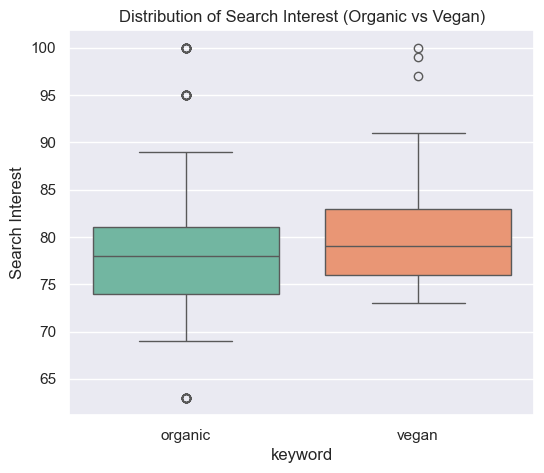

In [6]:
plt.figure(figsize=(6,5))
sns.boxplot(x="keyword", y="value", data=df, palette="Set2")
plt.title("Distribution of Search Interest (Organic vs Vegan)")
plt.ylabel("Search Interest")
plt.show()

<h2> Variability & Spread </h2>
Vegan is searched slightly more often on average and has a higher central tendency.

Extremes: Organic dips lower (min 63 vs. Vegan’s 73), showing greater downside volatility.

Outliers: Both spike to 100, but Organic shows more frequent sharp dips, Vegan more balanced fluctuations.

While the core variability is similar, Vegan is steadier and consistently popular, while Organic fluctuates more, sometimes spiking but also dropping harder.

In [7]:
df['date']=pd.to_datetime(df['date'])

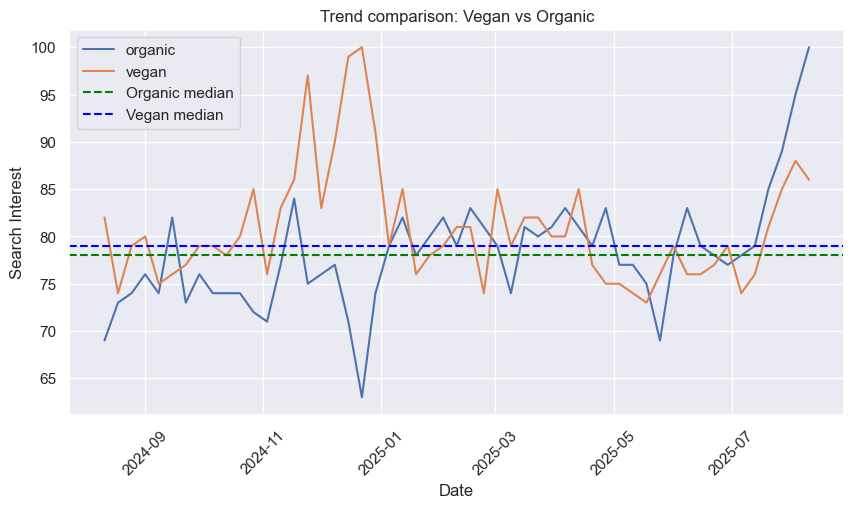

In [8]:
plt.figure(figsize=(10,5))
for kw in df["keyword"].unique():
    subset = df[df["keyword"] == kw].sort_values("date")
    plt.plot(subset["date"], subset["value"], label=kw)


plt.axhline(df[df["keyword"]=="organic"]["value"].median(), color="green", linestyle="--", label="Organic median")
plt.axhline(df[df["keyword"]=="vegan"]["value"].median(), color="blue", linestyle="--", label="Vegan median")
plt.title("Trend comparison: Vegan vs Organic")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [9]:
rolling_df = df.assign(
    rolling_mean=df.groupby("keyword")["value"]
                   .transform(lambda x: x.rolling(window=7).mean())
)

rolling_df = rolling_df.sort_values(["keyword", "date"])

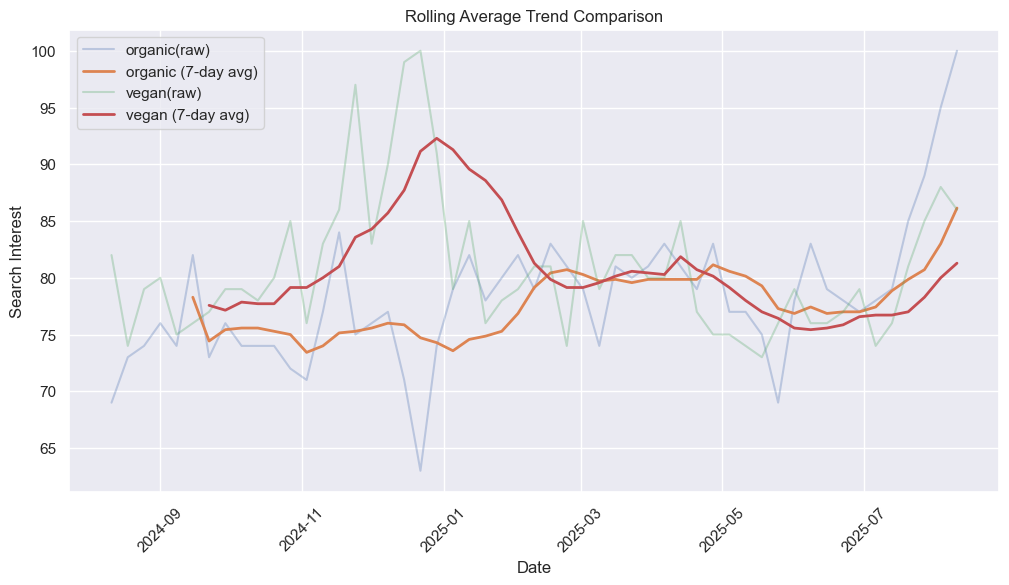

In [10]:
plt.figure(figsize=(12,6))
for kw in rolling_df['keyword'].unique():
    subset=rolling_df[rolling_df['keyword']==kw]
    plt.plot(subset['date'], subset['value'],alpha=0.3, label=f'{kw}(raw)')
    plt.plot(subset['date'], subset['rolling_mean'],linewidth=2, label=f'{kw} (7-day avg)')


plt.title("Rolling Average Trend Comparison")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.xticks(rotation=45)
plt.show()

<h2>Temporal Patterns</h2>

Vegan: Noticeable peak in Jan 2025, likely linked to New Year health/diet resolutions. Interest stabilizes afterward.

Organic: Relatively steady mid-period, but sharp surge in July 2025, possibly tied to seasonal health/produce trends.